## 01 import libraries & data
## 02 data cleaning
### - hypothesis for this notebook
## 03 data prep for regression analysis
## 04 regression analysis
### - reflection on model performance & possible data bias

# 01 import libraries & data

In [1]:
#import libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#graphs will display within the notebook
%matplotlib inline

In [3]:
#create path to project folder
path = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A6 - Adv. Analytics & Dashboard Design\Project A6'

In [4]:
#import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'merged3.csv'), index_col = False)

# 02 data cleaning

In [5]:
df.columns

Index(['ID', 'Severity', 'Distance(mi)', 'City', 'County', 'State', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Visibility(mi)',
       'Wind_Direction', 'Precipitation(in)', 'Weather_Condition',
       'Start_Time_no_ext', 'End_Time_no_ext', 'Zipcode_no_ext',
       'Airport_Type', 'Airport_Name', 'dist_to_weather(mi)',
       'project_time_length', 'const_total_minutes'],
      dtype='object')

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.head()

,ID,Severity,Distance(mi),City,County,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Direction,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,dist_to_weather(mi),project_time_length,const_total_minutes
0,C-2,2,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,2021-11-12 07:59:00,55.0,3.0,CALM,0.0,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,1.673991,0 days 00:23:30,23.500000
1,C-3,2,0.192266,Denver,Denver,CO,US/Mountain,KBKF,2021-10-12 06:58:00,37.0,10.0,WSW,0.0,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,9.058579,0 days 02:01:25,121.416667
2,C-4,4,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,2021-02-10 02:53:00,54.0,9.0,CALM,0.0,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,6.800913,7 days 21:12:50,11352.833333
3,C-5,2,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,2020-09-24 15:53:00,73.0,10.0,SSW,0.0,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,21.136875,1 days 05:06:54,1746.900000
4,C-6,2,0.747595,Dallas,Dallas,TX,US/Central,KDAL,2021-06-08 21:53:00,84.0,10.0,SSE,0.0,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,2.452856,0 days 00:29:00,29.000000


In [8]:
df.shape

(5153650, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153650 entries, 0 to 5153649
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   object 
 1   Severity             int64  
 2   Distance(mi)         float64
 3   City                 object 
 4   County               object 
 5   State                object 
 6   Timezone             object 
 7   Airport_Code         object 
 8   Weather_Timestamp    object 
 9   Temperature(F)       float64
 10  Visibility(mi)       float64
 11  Wind_Direction       object 
 12  Precipitation(in)    float64
 13  Weather_Condition    object 
 14  Start_Time_no_ext    object 
 15  End_Time_no_ext      object 
 16  Zipcode_no_ext       int64  
 17  Airport_Type         object 
 18  Airport_Name         object 
 19  dist_to_weather(mi)  float64
 20  project_time_length  object 
 21  const_total_minutes  float64
dtypes: float64(6), int64(2), object(14)
memory usage: 865.0+ MB


### check for missing values

In [10]:
#check for missing values
df.isnull().sum()

ID                     0
Severity               0
Distance(mi)           0
City                   0
County                 0
State                  0
Timezone               0
Airport_Code           0
Weather_Timestamp      0
Temperature(F)         0
Visibility(mi)         0
Wind_Direction         0
Precipitation(in)      0
Weather_Condition      0
Start_Time_no_ext      0
End_Time_no_ext        0
Zipcode_no_ext         0
Airport_Type           0
Airport_Name           0
dist_to_weather(mi)    0
project_time_length    0
const_total_minutes    0
dtype: int64

### duplicates check

In [11]:
#check duplicates
dups = df[df.duplicated()]

In [12]:
dups.shape
#no duplicates

(0, 22)

### mixed data check

In [13]:
for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print (col)


### extreme values check

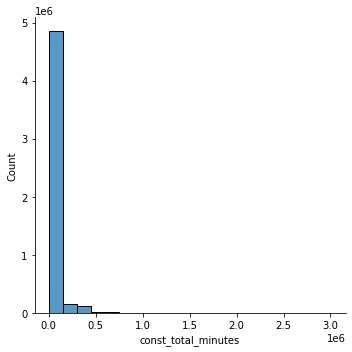

In [14]:
sns.displot(df['const_total_minutes'], bins = 20)

In [15]:
df.const_total_minutes.agg(['min', 'max', 'median', 'mean'])

min       1.500000e+00
max       3.010486e+06
median    4.278333e+02
mean      2.710810e+04
Name: const_total_minutes, dtype: float64

## hypothesis:
The farther away the construction from the weather station, the longer construction will take.
## null hypothesis:
There is no difference in the time that construction takes and the distance to the weather station.
## alternate hypothesis:
There is a difference in the time that construction takes and the distance to the weather station.

# 03 data prep for regression analysis

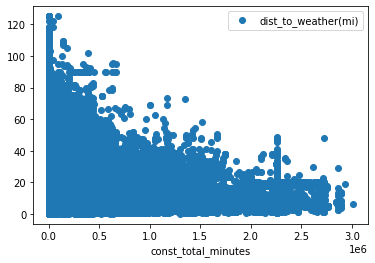

In [16]:
#create a scatterplot using matplotlib to look at variables

df.plot(x = 'const_total_minutes', y = 'dist_to_weather(mi)', style = 'o')
plt.title = ('Construction Time vs. Distance to Weather Station')
plt.xlabel = ('Construction Time (minutes)')
plt.ylabel = ('Distance to Weather Station (miles)')
plt.show()

In [17]:
#reshape the variables into NumPy arrays & put them into separate objects.
X = df['const_total_minutes'].values.reshape(-1, 1)
y = df['dist_to_weather(mi)'].values.reshape(-1, 1)

In [18]:
X

array([[2.35000000e+01],
       [1.21416667e+02],
       [1.13528333e+04],
       ...,
       [9.32543983e+05],
       [4.80000000e+02],
       [3.68000000e+02]])

In [19]:
y

array([[ 1.67399099],
       [ 9.05857923],
       [ 6.80091335],
       ...,
       [ 4.56049902],
       [14.07108473],
       [ 4.27181629]])

In [20]:
#split data into a training set & a test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 4)

# 04 regression analysis

In [21]:
#create a regression object
reg = LinearRegression()

In [22]:
#fit the regression object onto the training set
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
#predict values of y using x
y_predicted = reg.predict(X_test)

TypeError: 'str' object is not callable

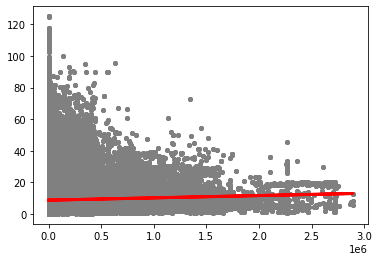

In [24]:
#create a plot that shows the line of regression from the model on the test set

plt.scatter(X_test, y_test, color='gray', s = 15)
plt.scatter(X_test, y_test, color='gray', s = 15)
plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Construction Time vs Dist to Weather Station (test set)')
plt.xlabel('Construction Time in minutes')
plt.ylabel('Distance to Weather Station in miles')
plt.show()

The regression line looks inappropriate with the data. There does not appear to have a clear trend.

In [25]:
#create objects that contain the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [26]:
print('Slope: ', reg.coef_)
print('Mean Squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[1.4521791e-06]]
Mean Squared error:  57.712186001736725
R2 score:  0.0004721277968899873


In [27]:
y_predicted

array([[8.80897476],
       [8.80882301],
       [8.80135808],
       ...,
       [8.81050621],
       [8.80104526],
       [8.80077533]])

In [28]:
#create a dataframe comparing the actual and predicted values of y

data = pd. DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,15.065636,8.808975
1,5.535725,8.808823
2,5.254573,8.801358
3,27.554013,8.802068
4,2.773707,8.800766
5,11.919519,8.824923
6,9.867583,8.800619
7,7.053979,8.800669
8,3.870260,8.802747
9,2.412892,8.801320


### compare how regression fits the training set

In [29]:
# predict

y_predicted_train = reg.predict(X_train)

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope: ', reg.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[1.4521791e-06]]
Mean squared error:  57.56060152935807
R2 score:  0.00046317724157496354


TypeError: 'str' object is not callable

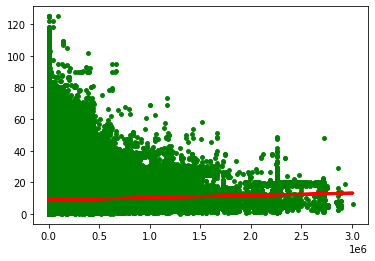

In [32]:
#visualizing the training set results

plt.scatter(X_train, y_train, color = 'green', s = 15)
plt.plot(X_train, y_predicted_train, color = 'red', linewidth = 3)
plt.title('Construction Time vs Dist to Weather Station (test set)')
plt.xlabel('Construction Total Time in minutes')
plt.ylabel('Distance to Weather Station in miles')
plt.show()

The mean squared error (MSE) is 57.7 for the test set, ideally I would like this value close to zero for the regression line to be a good representation of the data. Since this represents the squared distance between points and the line, the value of about 7.6 miles is not terribly far off. The training set was very close to this value also (57.6).

The r^2 value of 0.00047 for the test set indicates that since this value is very close to zero, it is a POOR fit for this set of data. This would be like saying that this line fits the data at a value of 0.04% (out of 100%!). Not very convincing. The training set has an r^2 value of 0.00046, which is almost exactly the test set's value.

### Reflection on possible data bias

Addressing exclusion bias:
In the cleaning process, I eliminated all distance = 0 mile construction jobs representing road construction. 

Addressing measurement bias:
The construction job time lengths have been converted to minutes. This data was computed by subtracting the end date/time from the beginning date/time. This may include time that construction was not active. Some jobs may be broken up into actual construction time starts/stops on consecutive days and some may be from the initiation of the construction project until the end of the project.
